In [1]:
import fitsio
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pixell

import sys
sys.path.append('../ThumbStack')

import flat_map
from flat_map import *

import catalog
from catalog import *

import universe
from universe import *

import mass_conversion
from mass_conversion import *

RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/home/theo/.local/lib/python3.8/site-packages/pixell/fft.py", line 77, in <module>
    engines['fftw'].FFTW(np.zeros((1,1,1)), np.zeros((1,1,1), dtype=np.complex128),
RuntimeError: Undefined plan with nthreads. This is a bug


In [2]:
cmass_gauss = fitsio.read('output/catalog/cmass_m_10x10_v2/cmass_m_10x10_v2_mock_count_gauss_car.fits')
rand_gauss = fitsio.read('output/catalog/cmass_m_10x10_randradec_v2/cmass_m_10x10_randradec_v2_mock_count_gauss_car.fits')

In [3]:
import matplotlib as mpl
# set some plotting defaults
mpl.rc(('lines', 'axes') , linewidth=4)
mpl.rc(('xtick', 'ytick'), labelsize=15)
mpl.rc(('xtick.major', 'ytick.major'), width=2)
mpl.rcParams['axes.labelsize'] = 18
mpl.rcParams['font.family'] = 'serif'
# mpl.rcParams['font.serif'] = ['Times New Roman'] + mpl.rcParams['font.serif']
# mpl.rcParams["font.family"] = "Times New Roman" 
mpl.rcParams['mathtext.fontset'] = 'stix'
# mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['legend.fontsize'] = 15
mpl.rcParams['font.size'] = 18
mpl.rcParams["figure.facecolor"] = 'white'
mpl.rcParams["axes.facecolor"] = 'white'
mpl.rcParams["savefig.facecolor"] = 'white'

def colorbar(mappable):
    from mpl_toolkits.axes_grid1 import make_axes_locatable
    import matplotlib.pyplot as plt
    last_axes = plt.gca()
    ax = mappable.axes
    fig = ax.figure
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    cbar = fig.colorbar(mappable, cax=cax)
    plt.sca(last_axes)
    return cbar

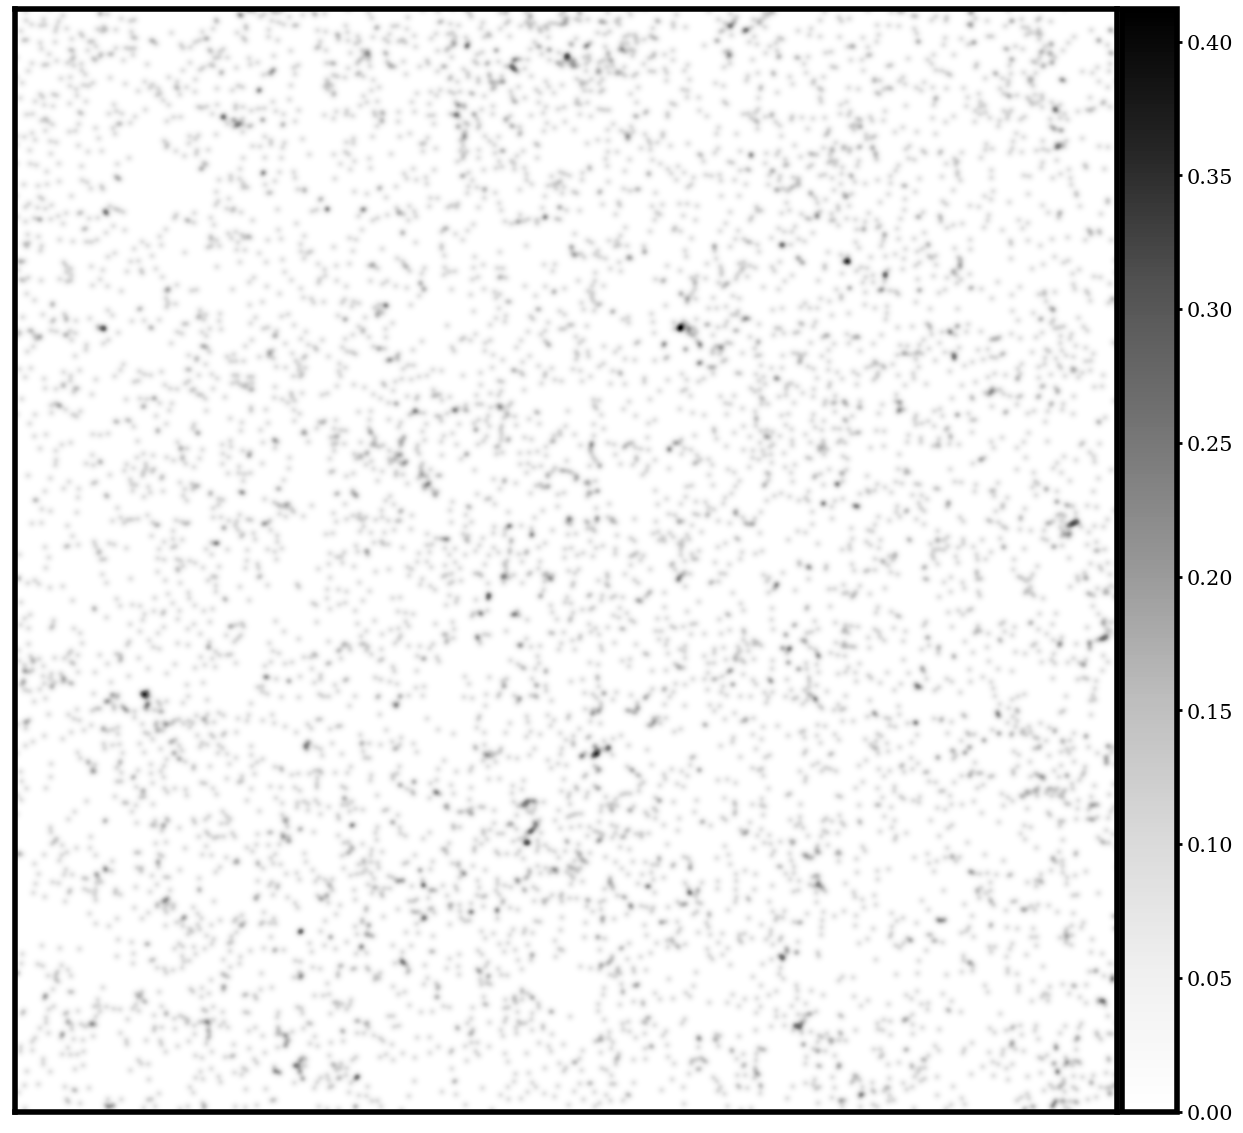

In [6]:
fig, axs = plt.subplots(1,1, figsize=(15,15))
im0 = axs.imshow(cmass_gauss, cmap='Greys', origin='lower', vmin=0)
# im1 = axs[1].imshow(rand_gauss, cmap='Greys', origin='lower')
axs.set_xticks([])
axs.set_yticks([])
cbar0 = colorbar(im0)
# cbar1 = colorbar(im1)

In [14]:
# map dimensions in degrees
sizeX = 10.
sizeY = 10.

# number of pixels for the flat map, let's do 0.5' pixels
nX = 1200
nY = 1200

# basic map object
baseMap = FlatMap(nX=nX, nY=nY, sizeX=sizeX*np.pi/180., sizeY=sizeY*np.pi/180.)

# multipoles to include in the lensing reconstruction
# reminder: l=100 ~ 1 degree
lMin = 30.; lMax = 3.5e3

# ell bins for power spectra
nBins = 21  # number of bins
lRange = (1., 2.*lMax)  # range for power spectra

# order: [[ra_min, dec_max], [ra_max, dec_min]]
box = np.array([[10., 210.], [20., 200.]]) * utils.degree
#box = np.array([[-5., 0.], [0., 5.]]) * utils.degree
resArcmin = 0.5 #1. #0.5  # 0.1   # map pixel size [arcmin]
shape,wcs = enmap.geometry(pos=box, res=resArcmin * utils.arcmin, proj='car')

# create a mask that keeps the whole area
boxMask = enmap.ones(shape, wcs=wcs)

In [7]:
cmassGaussFourier = baseMap.fourier(cmass_gauss)

In [8]:
randGaussFourier = baseMap.fourier(rand_gauss)

/home/theo/Documents/research/CMB/tau_sims/../ThumbStack/flat_map.py:456: RuntimeWarning: invalid value encountered in divide
  sCl /= np.sqrt(Nmodes)


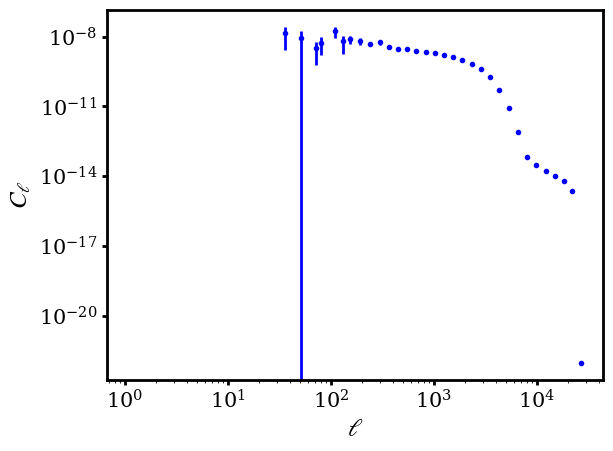

In [9]:
ell, cl, scl = baseMap.powerSpectrum(cmassGaussFourier, plot=True)

In [10]:
f = interp1d(ell, cl, kind='linear', bounds_error=False, fill_value=0)

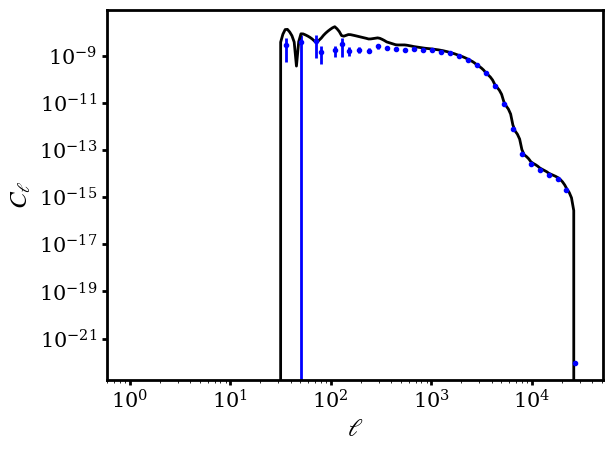

In [11]:
ell, clr, sclr = baseMap.powerSpectrum(randGaussFourier, plot=True, theory=[f])

In [12]:
cmass_gauss_normed = cmass_gauss/np.max(cmass_gauss)
rand_gauss_normed = rand_gauss/np.max(rand_gauss)

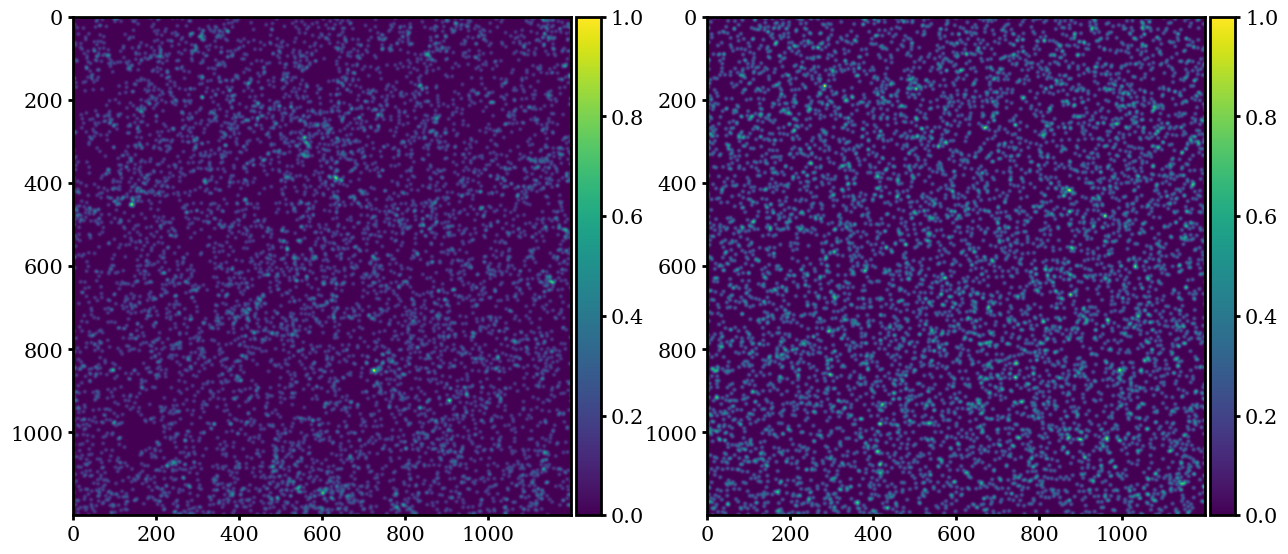

In [13]:
fig, axs = plt.subplots(1,2, figsize=(15,40))
im0 = axs[0].imshow(cmass_gauss_normed, cmap='viridis')
im1 = axs[1].imshow(rand_gauss_normed, cmap='viridis')
cbar0 = colorbar(im0)
cbar1 = colorbar(im1)

In [14]:
# fitsio.write('output/catalog/cmass_m_10x10_v2/cmass_m_10x10_v2_mock_count_gauss_car_normed.fits', cmass_gauss_normed)
# fitsio.write('output/catalog/cmass_m_10x10_randradec_v2/cmass_m_10x10_randradec_v2_mock_count_gauss_car_normed.fits', rand_gauss_normed)

In [14]:
cmassGaussFourier_n = baseMap.fourier(cmass_gauss_normed)

In [15]:
randGaussFourier_n = baseMap.fourier(rand_gauss_normed)

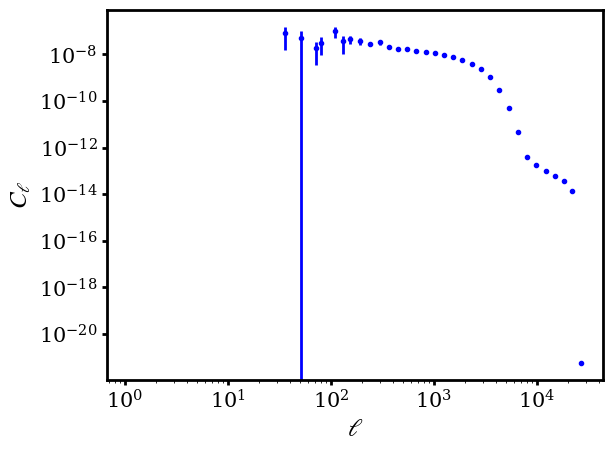

In [16]:
ell, cl, scl = baseMap.powerSpectrum(cmassGaussFourier_n, plot=True)

In [17]:
f = interp1d(ell, cl, kind='linear', bounds_error=False, fill_value=0)

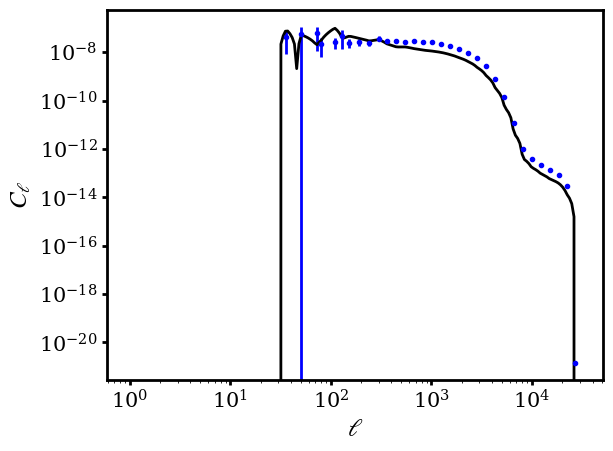

In [18]:
ell, clr, sclr = baseMap.powerSpectrum(randGaussFourier_n, plot=True, theory=[f])

## Checking correct RA/DEC orientation

### 3/22/2023: Found bug: was using transpose of tau field to make CMB+tau maps RIP!!!
### BUG REDACTED. EVERYTHING'S FINE.
#### Now checking manually that positions match between created maps and catalog RA/DEC values

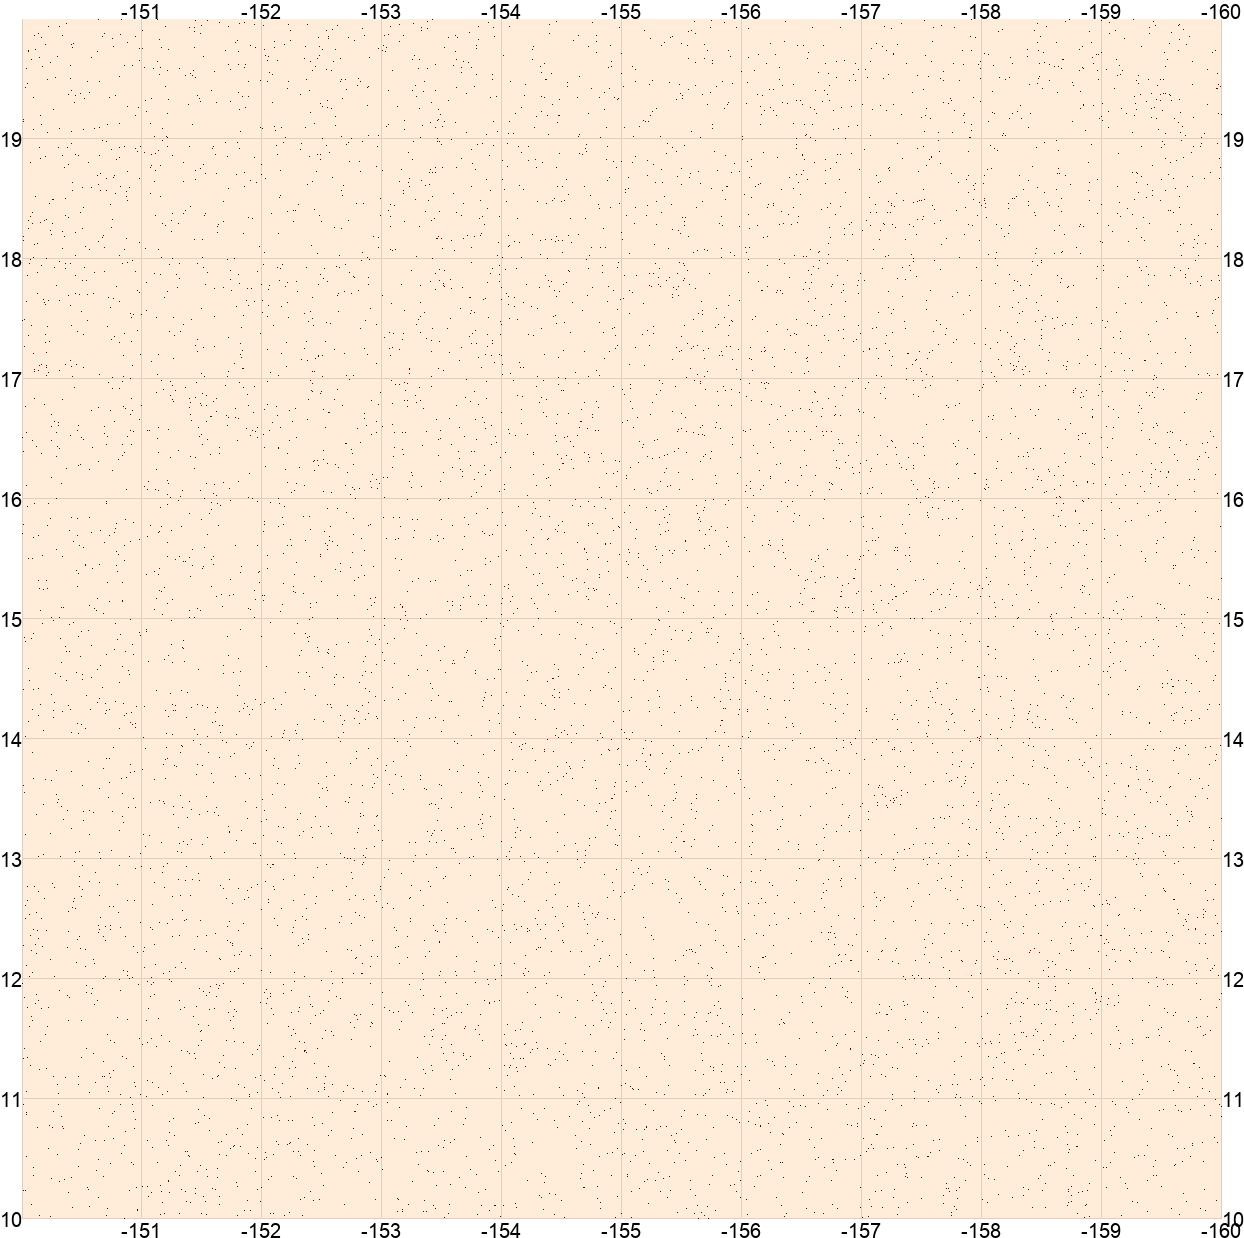

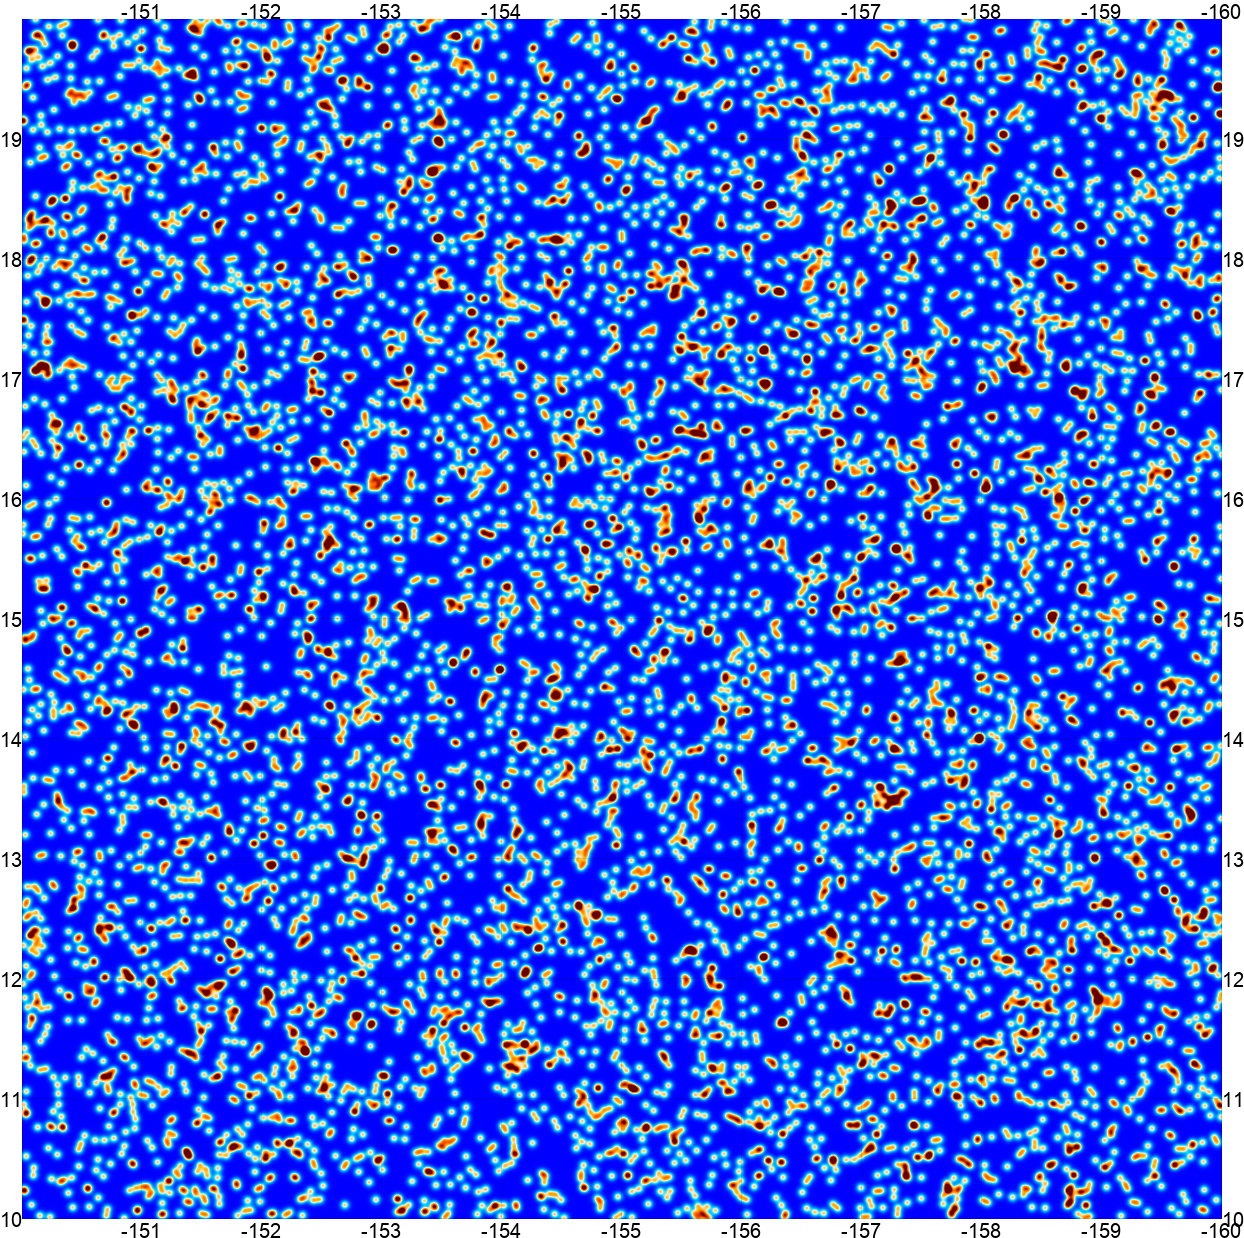

In [18]:
rand_dir = '/home/theo/Documents/research/CMB/tau_sims/output/catalog/cmass_m_10x10_randradec_v2'
diracpath = os.path.join(rand_dir, 'cmass_m_10x10_randradec_v2mock_count_dirac_car.fits')
gausspath = os.path.join(rand_dir, 'cmass_m_10x10_randradec_v2mock_count_gauss_car.fits')
diracMap = baseMap.copy()
gaussMap = baseMap.copy()
dData = fitsio.read(diracpath)
gData = fitsio.read(gausspath)
diracMap.data = dData
gaussMap.data = gData
diracEnmap = enmap.enmap(diracMap.data, wcs)
gaussEnmap = enmap.enmap(gaussMap.data, wcs)
pixell.enplot.pshow(diracEnmap)
pixell.enplot.pshow(gaussEnmap)

#### looks like pixell does the customary ra[ra>180] -= 360.

- load full catalog from ./output/catalog/cmass_m_10x10_randradec_v2/catalog.txt


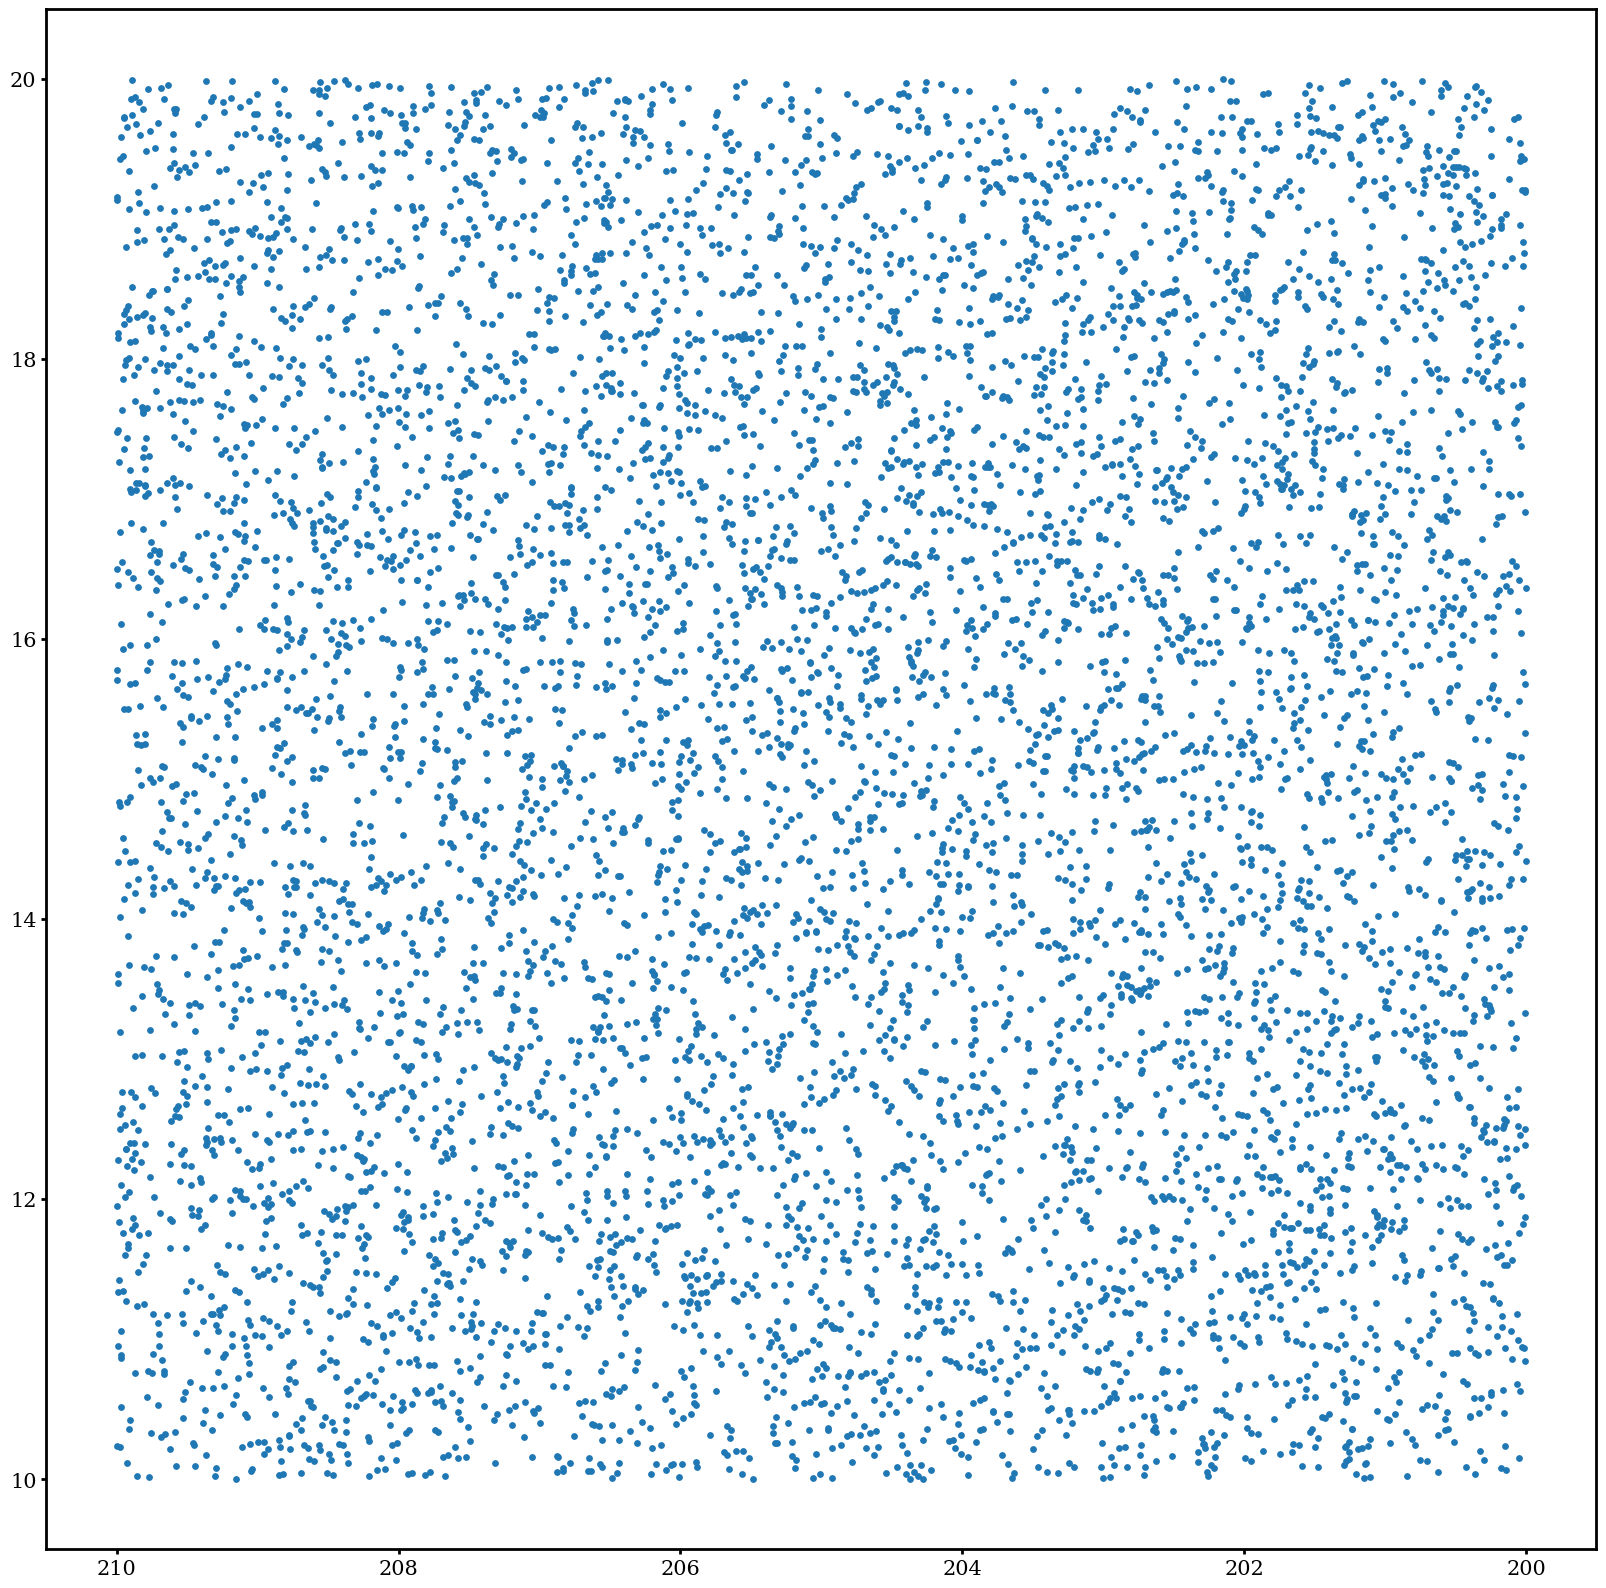

In [24]:
## Compare to RA/DEC positions from the catalog itself
nProc = 1
u = Universe()
massConversion = MassConversionKravtsov14()
cmass_10x10_rand = Catalog(u, massConversion, name="cmass_m_10x10_randradec_v2")
fig, ax = plt.subplots(1,1, figsize=(20,20))
plt.scatter(cmass_10x10_rand.RA, cmass_10x10_rand.DEC, s=15)
plt.gca().invert_xaxis()

Matches up now yay!